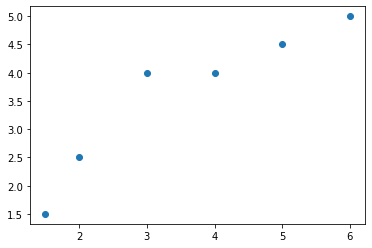

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('polynomial.csv')
plt.scatter(df['x'], df['y'])

In [2]:
df.head()

,x,y
0,1.5,1.5
1,2.0,2.5
2,3.0,4.0
3,4.0,4.0
4,5.0,4.5


In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

x = df["x"].values
y = df["y"].values

x

array([1.5, 2. , 3. , 4. , 5. , 6. ])

In [7]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

model.fit(x,y)

LinearRegression()

In [8]:
y_pred = model.predict(x)

y_pred

array([[2.11643836],
       [2.46849315],
       [3.17260274],
       [3.87671233],
       [4.58082192],
       [5.28493151]])

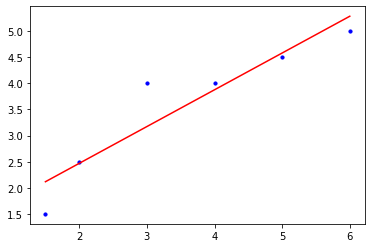

In [9]:
plt.scatter(x, y, s=10, color='b')
plt.plot(x, y_pred, color='r')
plt.show()

In [10]:
print('R-Squared for training set: %.4f' % model.score(x,y))

R-Squared for training set: 0.8658


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

degree = 2

poly = PolynomialFeatures(degree)
x_poly = poly.fit_transform(x)

x_poly

array([[ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  5.  , 25.  ],
       [ 1.  ,  6.  , 36.  ]])

In [12]:
model2 = LinearRegression()

model2.fit(x_poly, y)

y_poly_pred = model2.predict(x_poly)

y_poly_pred

array([[1.71496131],
       [2.40472915],
       [3.52566638],
       [4.30180567],
       [4.73314703],
       [4.81969046]])

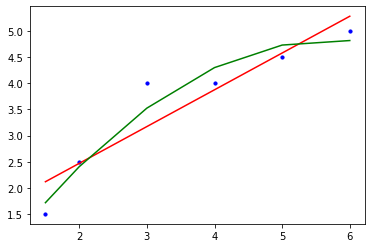

In [13]:
plt.scatter(x, y, s=10, color='b')
plt.plot(x, y_pred, color='r')
plt.plot(x, y_poly_pred, color='g')
plt.show()

In [14]:
print(model.intercept_)
print(model.coef_)

[1.06027397]
[[0.70410959]]


In [15]:
# model.score(x_poly,y)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 3)

In [16]:
from sklearn.datasets import load_boston

dataset = load_boston()

df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

In [17]:
x = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT','RM'])
Y = df['MEDV']

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.3,random_state=5)

In [19]:
degree = 2

poly = PolynomialFeatures(degree)
x_train_poly = poly.fit_transform(x_train)

In [22]:
x_train_poly

array([[  1.      ,  23.98    ,   6.459   , 575.0404  , 154.88682 ,
         41.718681],
       [  1.      ,  21.52    ,   6.193   , 463.1104  , 133.27336 ,
         38.353249],
       [  1.      ,   7.74    ,   6.75    ,  59.9076  ,  52.245   ,
         45.5625  ],
       ...,
       [  1.      ,  17.6     ,   5.67    , 309.76    ,  99.792   ,
         32.1489  ],
       [  1.      ,  10.97    ,   6.326   , 120.3409  ,  69.39622 ,
         40.018276],
       [  1.      ,   5.57    ,   5.936   ,  31.0249  ,  33.06352 ,
         35.236096]])

In [21]:
print(poly.get_feature_names(['x1','x2']))

['1', 'x1', 'x2', 'x1^2', 'x1 x2', 'x2^2']


In [28]:
model = LinearRegression()
model.fit(x_train_poly, Y_train)

x_test_poly = poly.fit_transform(x_test)
model.score(x_test_poly, Y_test)

0.7340402577136049

In [25]:
print(model.intercept_)
print(model.coef_)

26.933430523839128
[ 0.00000000e+00  1.47424550e+00 -6.70204730e+00  7.93570743e-04
 -3.66578385e-01  1.17188007e+00]


In [29]:
price_pred = model.predict(x_test_poly)

25.289374127397867


Text(0.5, 1.0, 'Actual prices vs Predicted prices')

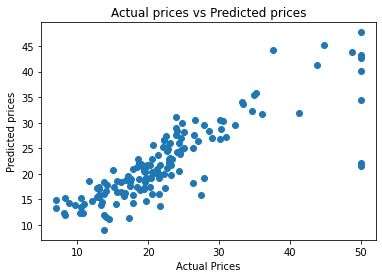

In [30]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(Y_test, price_pred)
print(mse)

plt.scatter(Y_test, price_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted prices")
plt.title("Actual prices vs Predicted prices")